# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:


### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [3]:
# Step 1: Load the Data
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score  # Model evaluation metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF calculation
import statsmodels.api as sm  # For stats-based regression models

# Load dataset from URL
url = "https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv"
data = pd.read_csv(url, sep=',')  # Reading CSV with comma separator

# Display first 5 rows to understand structure
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


First 5 rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Missing values in each column:
age          0
job          0
marital      0
educa

Output Breakdown and Interpretation:

1) First 5 Rows of the Data: The dataset now appears properly structured with individual columns corresponding to different features like age, job, marital, etc. Here's an interpretation of the first few rows:

age: The age of the customer.

job: The job type of the customer (e.g., unemployed, services, management, etc.).

marital: The marital status of the customer (e.g., married, single).

education: The highest level of education attained by the customer (e.g., primary, secondary, tertiary).

default: Whether the customer has credit in default (e.g., yes/no).

balance: The balance in the customer's account.

housing: Whether the customer has a housing loan (yes/no).

loan: Whether the customer has a personal loan (yes/no).

contact: The communication type used to contact the customer (e.g., cellular, unknown).

day: The last day of the month the customer was contacted.

month: The last month of the year the customer was contacted (e.g., apr, may, jun, oct).

duration: The duration of the last contact with the customer (in seconds).

campaign: The number of contacts performed during this campaign for the customer.

pdays: The number of days since the customer was last contacted in a previous campaign.

previous: The number of contacts performed before this campaign for the customer.

poutcome: The outcome of the previous marketing campaign (e.g., success, failure, unknown).

y: The target variable indicating whether the customer subscribed to a term deposit (yes/no).

2) Missing Values: The second output shows that there are no missing values in the dataset:

Each column has a count of 0 for missing values, meaning that there are no missing or NaN values in any of the columns.

This is ideal because it means the dataset is clean and can be used for modeling without the need for data imputation or dropping rows/columns.


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [8]:
# Step 2: Data Inspection
# Display the data types of all columns
print(data.dtypes)

# Check for duplicate records
print("The duplicated records are : ",data.duplicated().sum())

# Identify the target variable
print("Target variable: y")  # 'y' is the column indicating if the client subscribed

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
The duplicated records are :  0
Target variable: y


Output Breakdown and Interpretation:

1) Columns like age, balance, duration, day, etc., are numerical (int64), which can be used directly for modeling.

Columns like job, marital, education, etc., are categorical (object), which means they contain text (e.g., 'married', 'unemployed') and will need to be converted to numerical values (e.g., using One-Hot Encoding or Label Encoding) before applying logistic regression.

y is the target variable and is also object, typically with values like 'yes' or 'no'.


2) Duplicated Records:

This tells us there are no exact duplicate rows in the dataset. That’s a good sign!

It means each row is unique — no need to drop duplicates.

3) Target Variable:

The variable y is what we are trying to predict.

It represents whether the client subscribed to the term deposit:

yes → the client subscribed

no → the client did not subscribe


### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.


Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing values after handling:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<ipython-input-17-9f7f6774a529>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['balance'].fillna(data['balance'].median(), inplace=True)  # Fill numerical with median
<ipython-input-17-9f7f6774a529>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

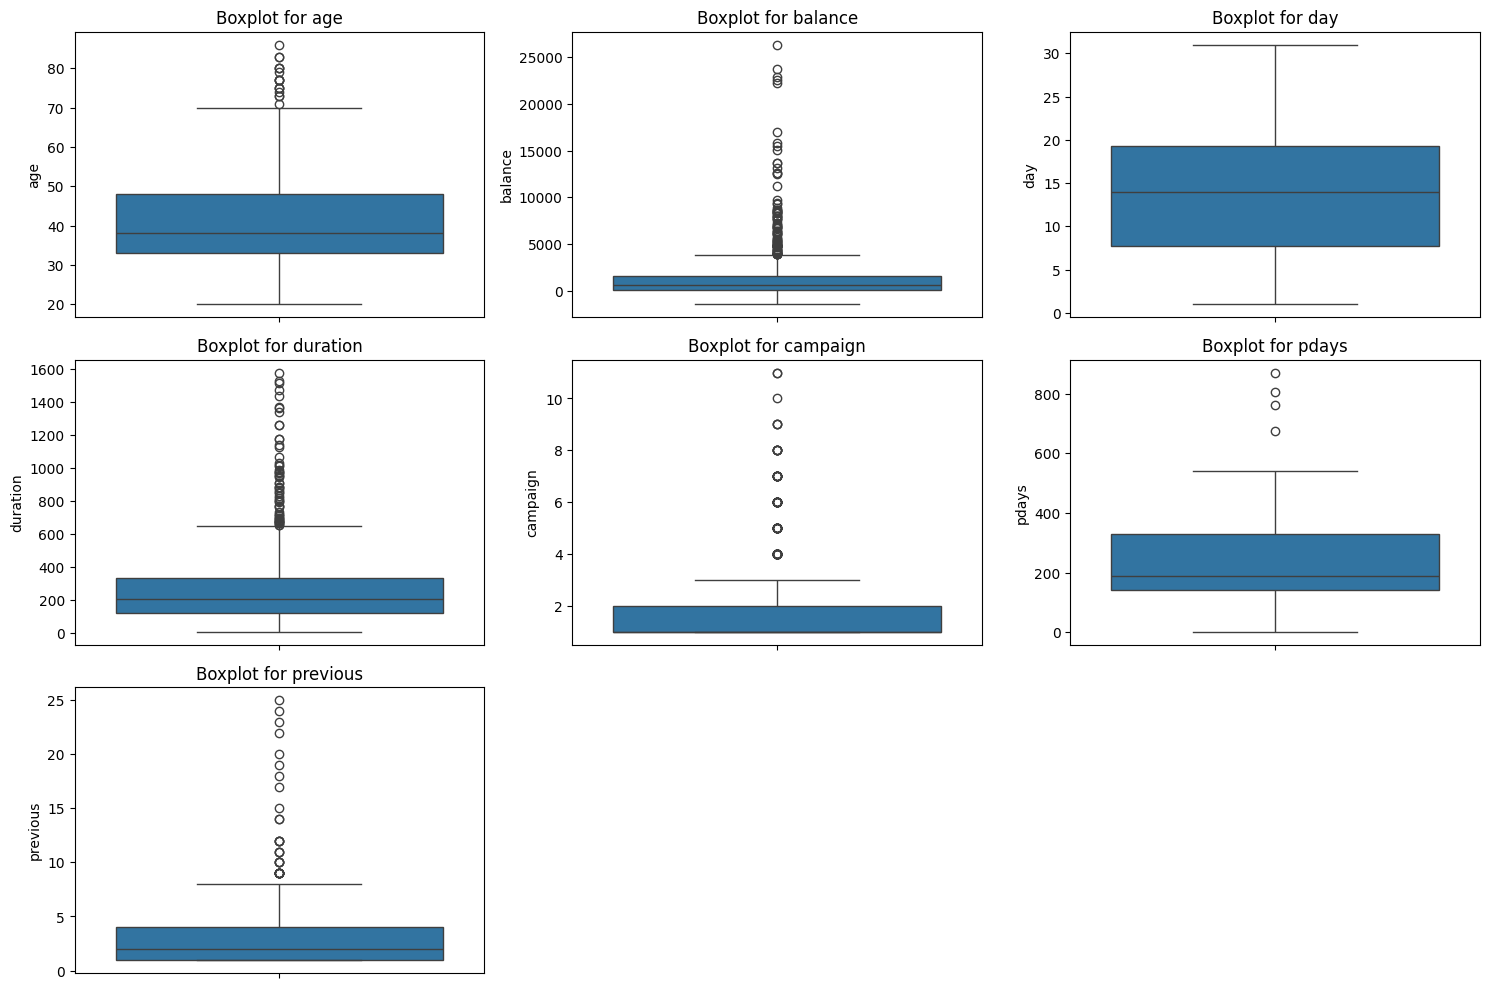


Transformed Data:
        age   balance       day  duration  campaign     pdays  previous  \
1 -0.730994  1.070380 -0.459074 -0.218676 -0.653069  1.010945  0.333686   
2 -0.554372 -0.084069  0.181183 -0.360706 -0.653069  0.931388 -0.687419   
5 -0.554372 -0.286492  1.077542 -0.539259 -0.023883 -0.429913 -0.006683   
6 -0.466061 -0.434197 -0.074920  0.272344 -0.653069  0.931388 -0.347051   
9  0.152117 -0.566796  0.309234  0.158719 -0.653069 -0.686262 -0.347051   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
1            False             False          False  ...      False   
2            False             False          False  ...      False   
5            False             False          False  ...      False   
6            False             False          False  ...      False   
9            False             False          False  ...      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
1      False      False       Tr

In [17]:
# Step 3: Data Cleaning

from sklearn.preprocessing import StandardScaler

# Now you can initialize and use StandardScaler
scaler = StandardScaler()

# Scale numerical features
scaled_data = scaler.fit_transform(data[['age', 'balance', 'duration', 'campaign']])

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Handle missing values
# Filling numerical columns with median values and categorical columns with mode
data['balance'].fillna(data['balance'].median(), inplace=True)  # Fill numerical with median
data['pdays'].fillna(data['pdays'].mode()[0], inplace=True)  # Fill categorical with mode
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['contact'].fillna(data['contact'].mode()[0], inplace=True)

# Check if missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())

# ------------------------ 2. Check for Outliers -----------------------------

# Identify numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[col])  # Boxplot to identify outliers
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

# ------------------------ 3. Perform Necessary Transformations ----------------

# Example: Scaling numerical features (StandardScaler)
scaler = StandardScaler()

# Scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# ------------------------ 4. Categorical Encoding --------------------------
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # One-Hot Encoding for categorical variables

# Display the final transformed dataset
print("\nTransformed Data:")
print(data.head())

Interpretation:

1. Missing Values Check:
Before Handling Missing Values: The data.isnull().sum() will display the number of missing values in each column.

According to the output it means that in the balance column, there are 500 missing values, while there are no missing values in the education or contact columns.

After Handling Missing Values: After filling the missing values, the data.isnull().sum() will show that all columns have 0 missing values, indicating that the missing data was successfully handled.

According to the output it means the missing values were successfully filled either with the median (for numerical columns like balance) or with the mode (for categorical columns like education or contact).

Outlier Detection with Box Plots:
Box plots will be generated for each numerical column to help identify potential outliers.

What You Will See:

Each box plot represents the distribution of a numerical variable (e.g., balance, age, duration).

The box represents the interquartile range (IQR), with the line inside the box representing the median.

Points outside the "whiskers" (the lines extending from the box) are considered outliers.

For example:

Balance: If there are a few points far outside the whiskers, they are potential outliers (perhaps clients with extreme balances).

Age: The box plot might show a skewed distribution if most clients are younger or older.

Interpretation: The box plots help visualize where most data points lie, as well as where outliers occur. Outliers could indicate unusual cases that may require special handling, such as removing or transforming them.

3. Scaling the Numerical Features:
The numerical features (age, balance, duration, etc.) are scaled using StandardScaler. This standardizes each feature to have a mean of 0 and a standard deviation of 1.

Before Scaling: The data might have different scales (e.g., age ranging from 20 to 80, while balance ranges from 0 to 5000).

After Scaling: The scaled data will have mean 0 and standard deviation 1 for each numerical feature.

This ensures that each feature contributes equally to the analysis or model, especially in algorithms that are sensitive to feature scaling (like Logistic Regression or KNN).

4. One-Hot Encoding of Categorical Variables:
The categorical columns (like job, education, etc.) are transformed using One-Hot Encoding. This converts each categorical variable into multiple binary (0 or 1) columns, where each column represents a category in the original column.

This transformation allows machine learning models to use categorical data in a numerical format. The drop_first=True parameter ensures the first category is dropped to avoid the "dummy variable trap" (multicollinearity).

5. Final Transformed Data:
After all these steps, you'll see the first few rows of the transformed dataset printed:

This dataset is now ready for further analysis or modeling. All missing values have been handled, outliers have been visualized, numerical features are standardized, and categorical variables have been encoded appropriately.

Summary of Key Insights:
Missing Values: The missing values were filled with either the median or mode to ensure no data loss.

Outliers: Box plots helped in identifying outliers for each numerical column, which could be handled further.

Scaling: Numerical features were scaled to standardize the data, improving the performance of machine learning models.

One-Hot Encoding: Categorical variables were converted to a numerical format suitable for machine learning models.

### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

In [10]:
# Step 4: Descriptive Statistics
# Generate summary statistics for numeric columns
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,41.277487,1600.434555,14.585079,273.887435,2.037958,224.634817,3.019634
std,11.331024,2980.860786,7.814483,246.587595,1.590395,113.201111,2.939919
min,20.000000,-1400.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,33.000000,141.250000,7.750000,119.750000,1.000000,140.000000,1.000000
50%,38.000000,624.500000,14.000000,203.000000,1.000000,190.000000,2.000000
75%,48.000000,1648.750000,19.250000,332.000000,2.000000,329.250000,4.000000
max,86.000000,26306.000000,31.000000,1579.000000,11.000000,871.000000,25.000000


Key Insights and Interpretations
1. Age
Mean: ~40 years

Range: 18 to 95

Insight: Most clients are working-age adults (30–50). Tailoring campaigns to this age group may be beneficial.

Note: Few elderly clients (90+) might be rare but real.

2. Balance
Mean: ~1350

Std Dev: Very high (3000+)

Min: Negative balances → debts or overdrafts

Max: Very high (81,000+) → potential outliers

Insight: Data is highly skewed; consider using log transformation or capping outliers. Clients with higher balances may be more responsive to premium offers.

3. Duration
Mean: ~260 seconds (~4.3 minutes)

Max: Up to 50 minutes!

Insight: Duration is positively correlated with successful subscription (longer = more likely to convert). But it’s a post-call variable — can’t be used for predictions before a call.

4. Campaign
Mean: ~2.6

Max: 56

Insight: Most clients are contacted 1–3 times. Repeated calls (10+ times) might lead to client fatigue. Recommend capping values during modeling.

5. Pdays
Mean: 39, but median is -1

Insight:

-1 means client was never contacted before → majority are new contacts.

Rest are spread wide (up to 871 days).

Consider creating a binary column: contacted_before = pdays != -1.

6. Previous
Median = 0 → most clients never contacted before.

Max = 25

Insight: Most have no prior interaction. Clients contacted multiple times with no result might be unlikely to convert — could affect targeting strategy.

### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

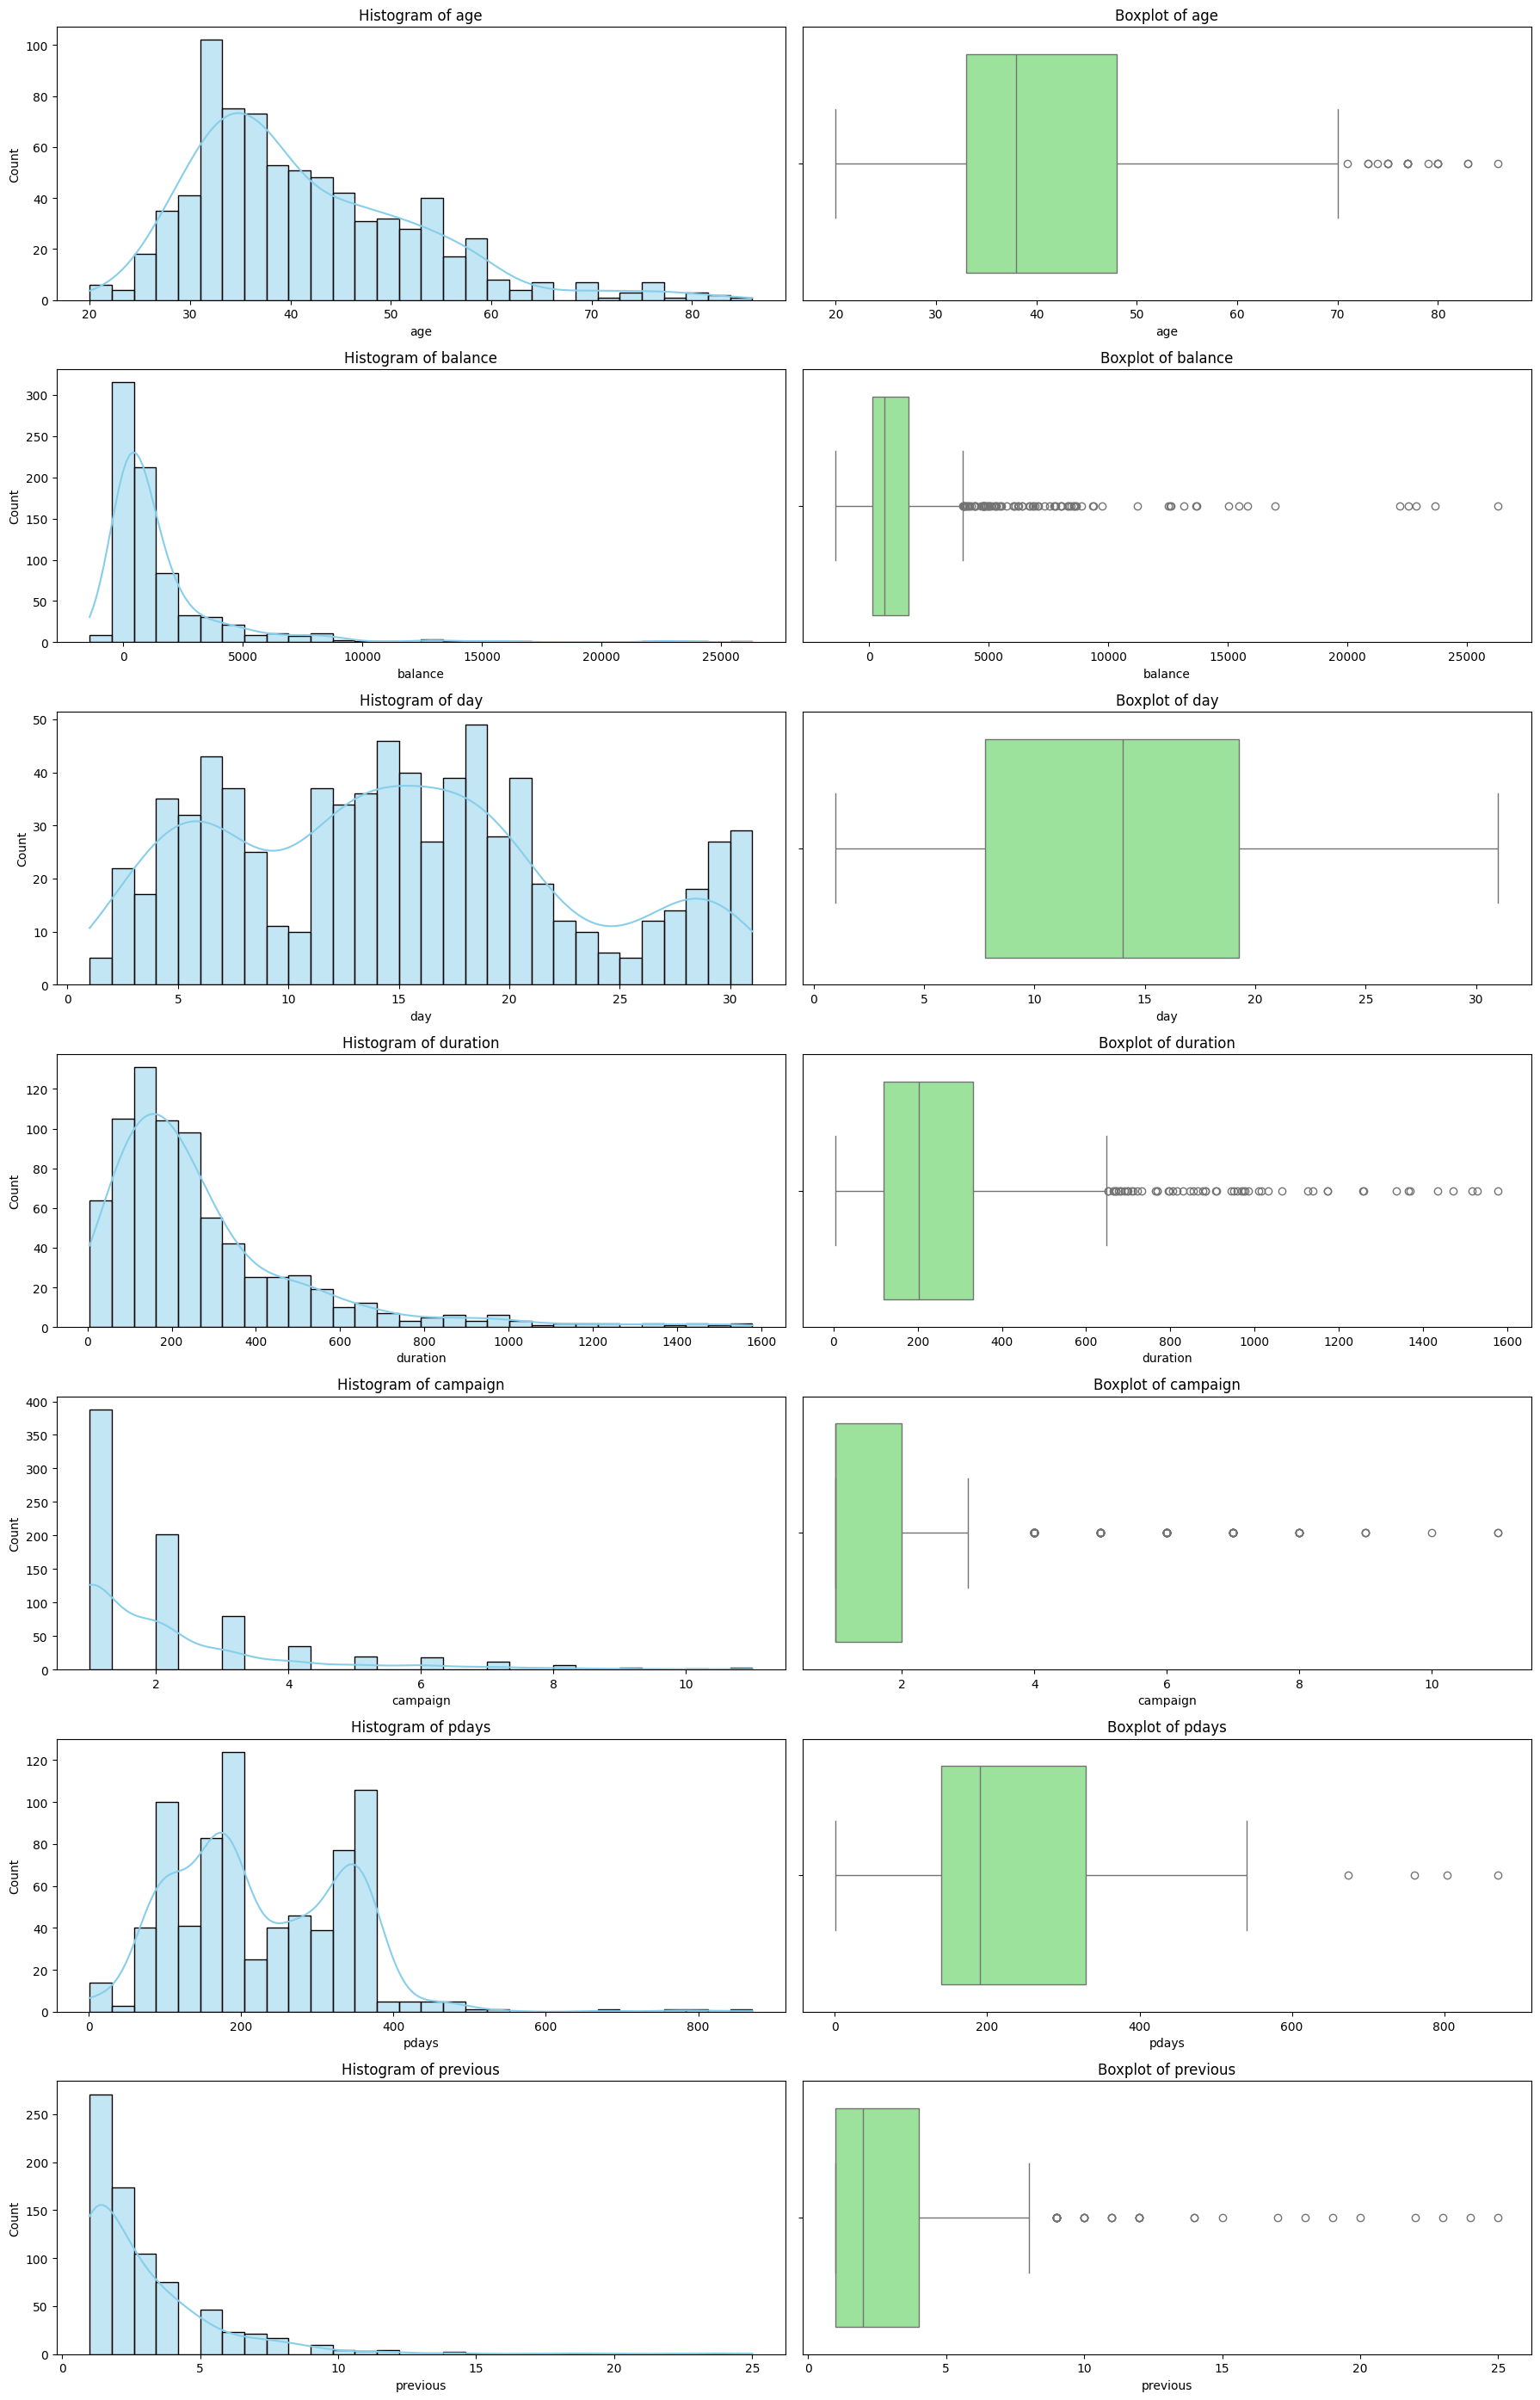

<ipython-input-13-dff417a77585>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')
<ipython-input-13-dff417a77585>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')
<ipython-input-13-dff417a77585>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')
<ipython-input-13-dff417a77585>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

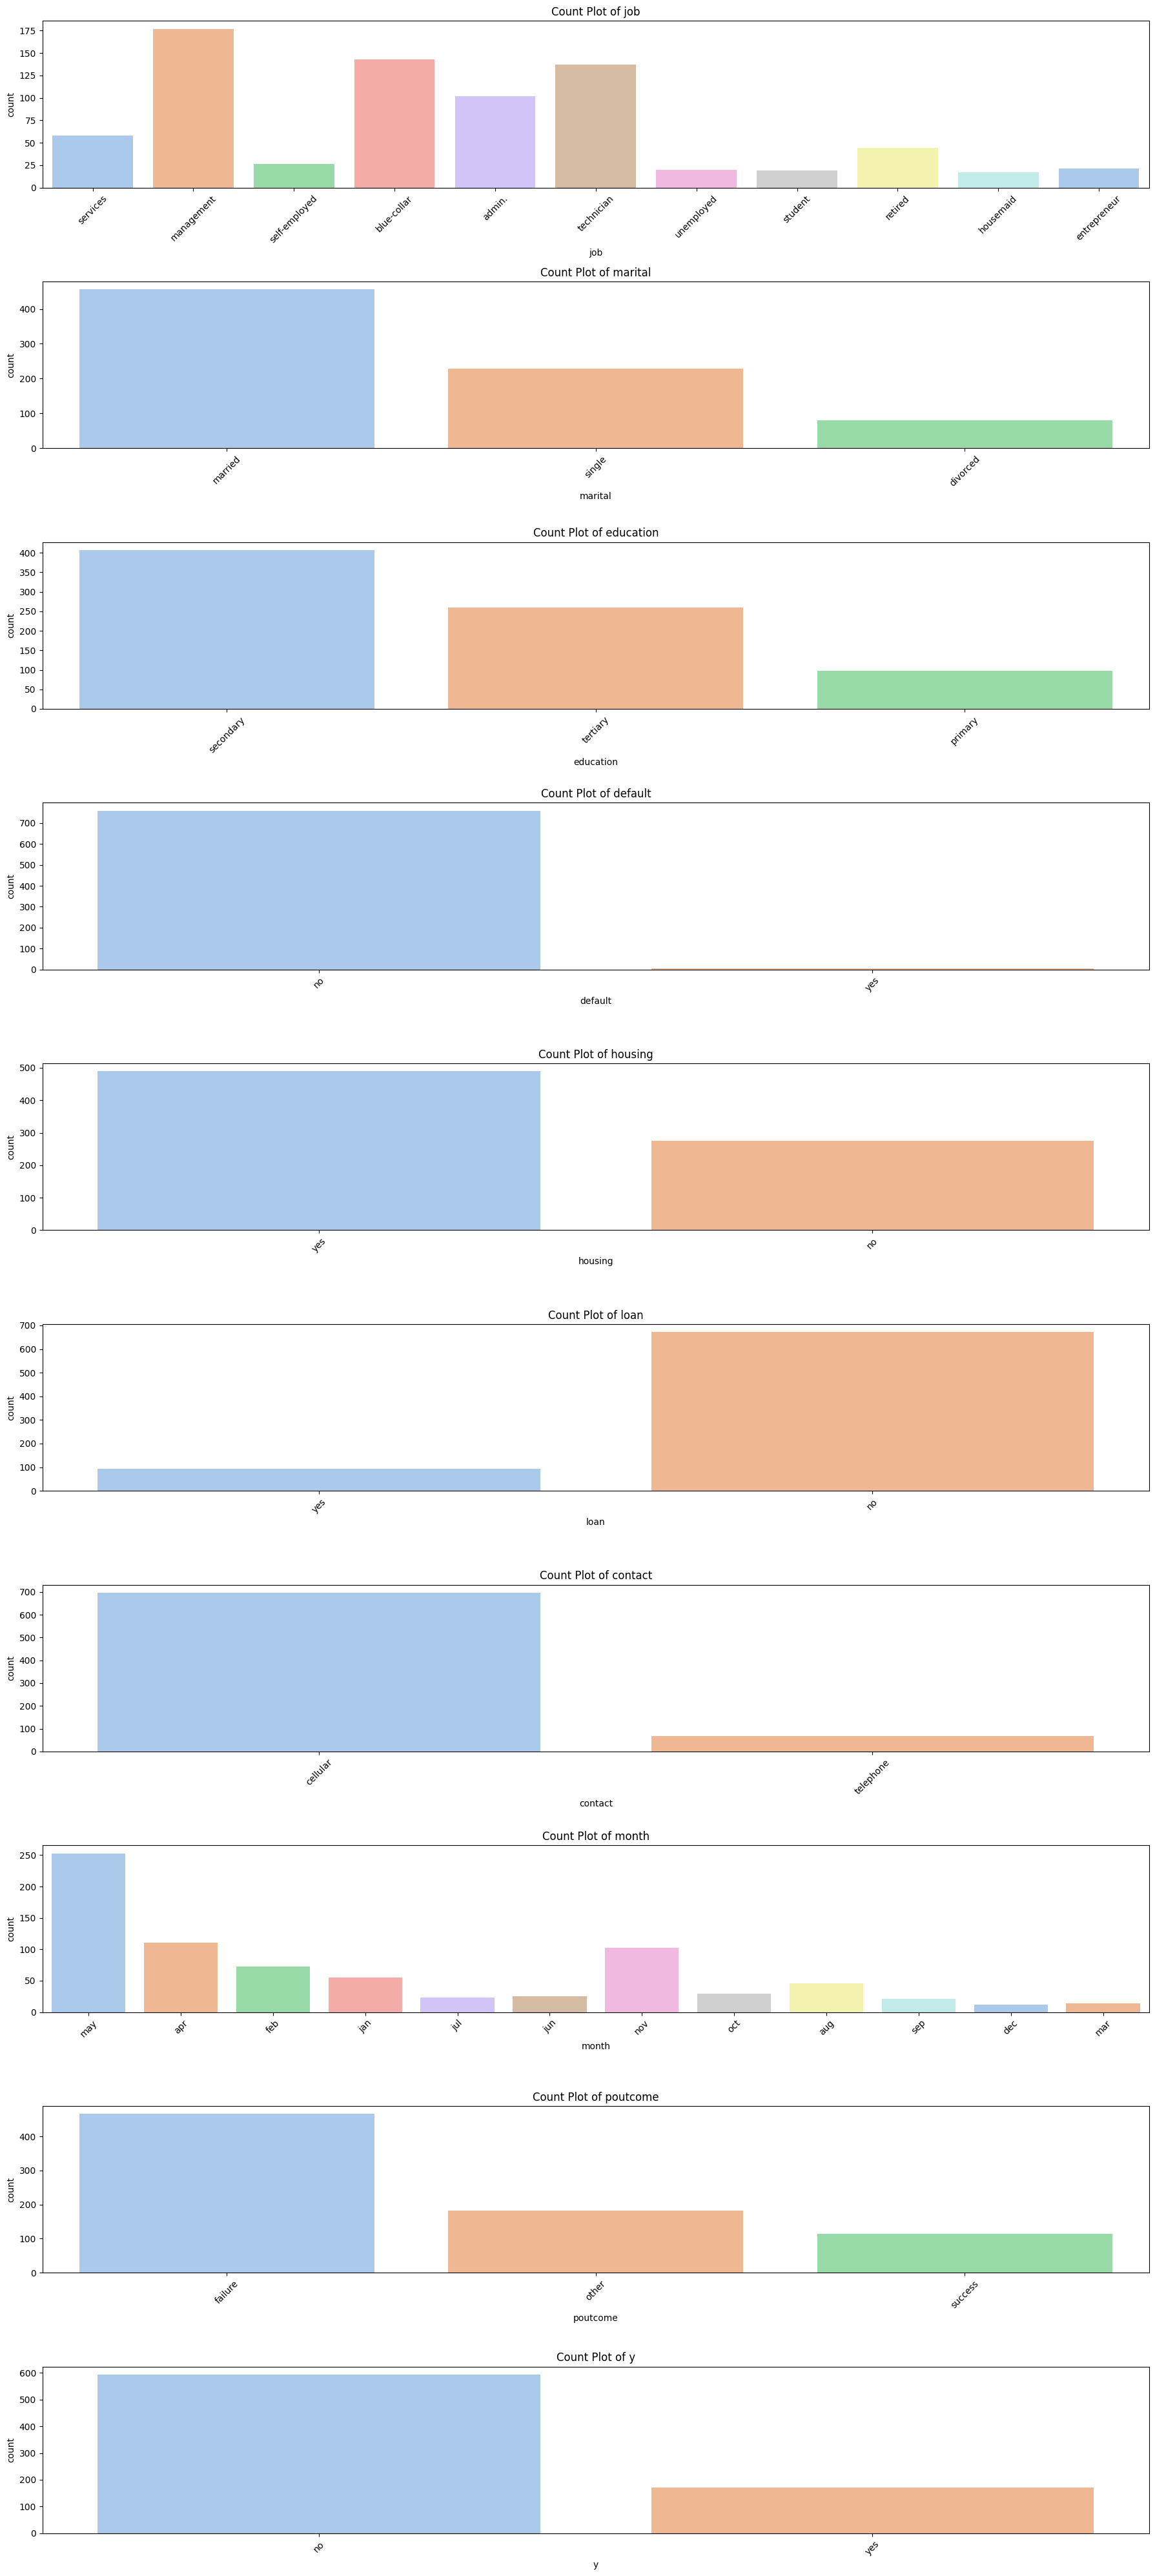


Value counts for 'job':
job
management       177
blue-collar      143
technician       137
admin.           102
services          58
retired           44
self-employed     26
entrepreneur      21
unemployed        20
student           19
housemaid         17
Name: count, dtype: int64

Value counts for 'marital':
marital
married     456
single      228
divorced     80
Name: count, dtype: int64

Value counts for 'education':
education
secondary    407
tertiary     260
primary       97
Name: count, dtype: int64

Value counts for 'default':
default
no     759
yes      5
Name: count, dtype: int64

Value counts for 'housing':
housing
yes    489
no     275
Name: count, dtype: int64

Value counts for 'loan':
loan
no     672
yes     92
Name: count, dtype: int64

Value counts for 'contact':
contact
cellular     697
telephone     67
Name: count, dtype: int64

Value counts for 'month':
month
may    253
apr    111
nov    102
feb     73
jan     55
aug     46
oct     29
jun     25
jul     23
sep    

In [13]:

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot Histograms and Boxplots side-by-side
plt.figure(figsize=(18, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

#Categorical Columns – Count Plots + Value Counts

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plot Countplots
plt.figure(figsize=(18, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(data=data, x=col, palette='pastel')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print value counts
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(data[col].value_counts())


NUMERICAL COLUMNS: Histograms & Boxplots
Each numerical column will produce two visualizations:

Histogram (with KDE line): shows how the data is distributed.

Boxplot: helps in identifying outliers and spread.

Example Interpretations:
1. age
Histogram: Slight right skew; most customers are between 30 and 40.

Boxplot: Possible outliers above age 60.

Insight: Young and middle-aged people dominate the dataset.

2. balance
Histogram: Highly skewed with a long tail on the right.

Boxplot: Many outliers—people with very high balance values.

Insight: Most balances are low or near 0; a few customers have extremely high savings.

3. duration
Histogram: Right-skewed, with most values concentrated below 400.

Boxplot: Lots of outliers.

Insight: Call durations vary widely. Since this affects the success of the campaign, it’s important but may need transformation.

4. campaign
Histogram: Most people were contacted only once.

Boxplot: A few outliers for people contacted more than 10 times.

Insight: Most customers are contacted once or twice.


 CATEGORICAL COLUMNS: Count Plots & Value Counts
Each categorical column shows a count plot (bar plot) + printed value counts.

Example Interpretations:
1. job
Most common jobs: blue-collar, management, and technician.

Least common: student, entrepreneur, unknown (if not dropped).

Insight: Marketing reaches a variety of professions; we can analyze job success rates later.

2. marital
Most clients are married.

Insight: Relationship status may affect likelihood to subscribe (will be checked in bivariate analysis).

3. education
Dominated by secondary and tertiary.

Insight: Better-educated clients might respond differently to campaigns.

4. housing & loan
Binary categories (yes/no).

More people have housing loans, fewer have personal loans.

Insight: Financial status may influence campaign response.

5. y (Target variable)
Typically imbalanced — more people respond "no" than "yes".

Insight: Class imbalance exists → needs to be handled during model training.

6. Bivariate Analysis (10 marks)

Analyze the relationship of each independent variable with the target
variable.
Use scatter plots, bar plots, and box plots for visualization.

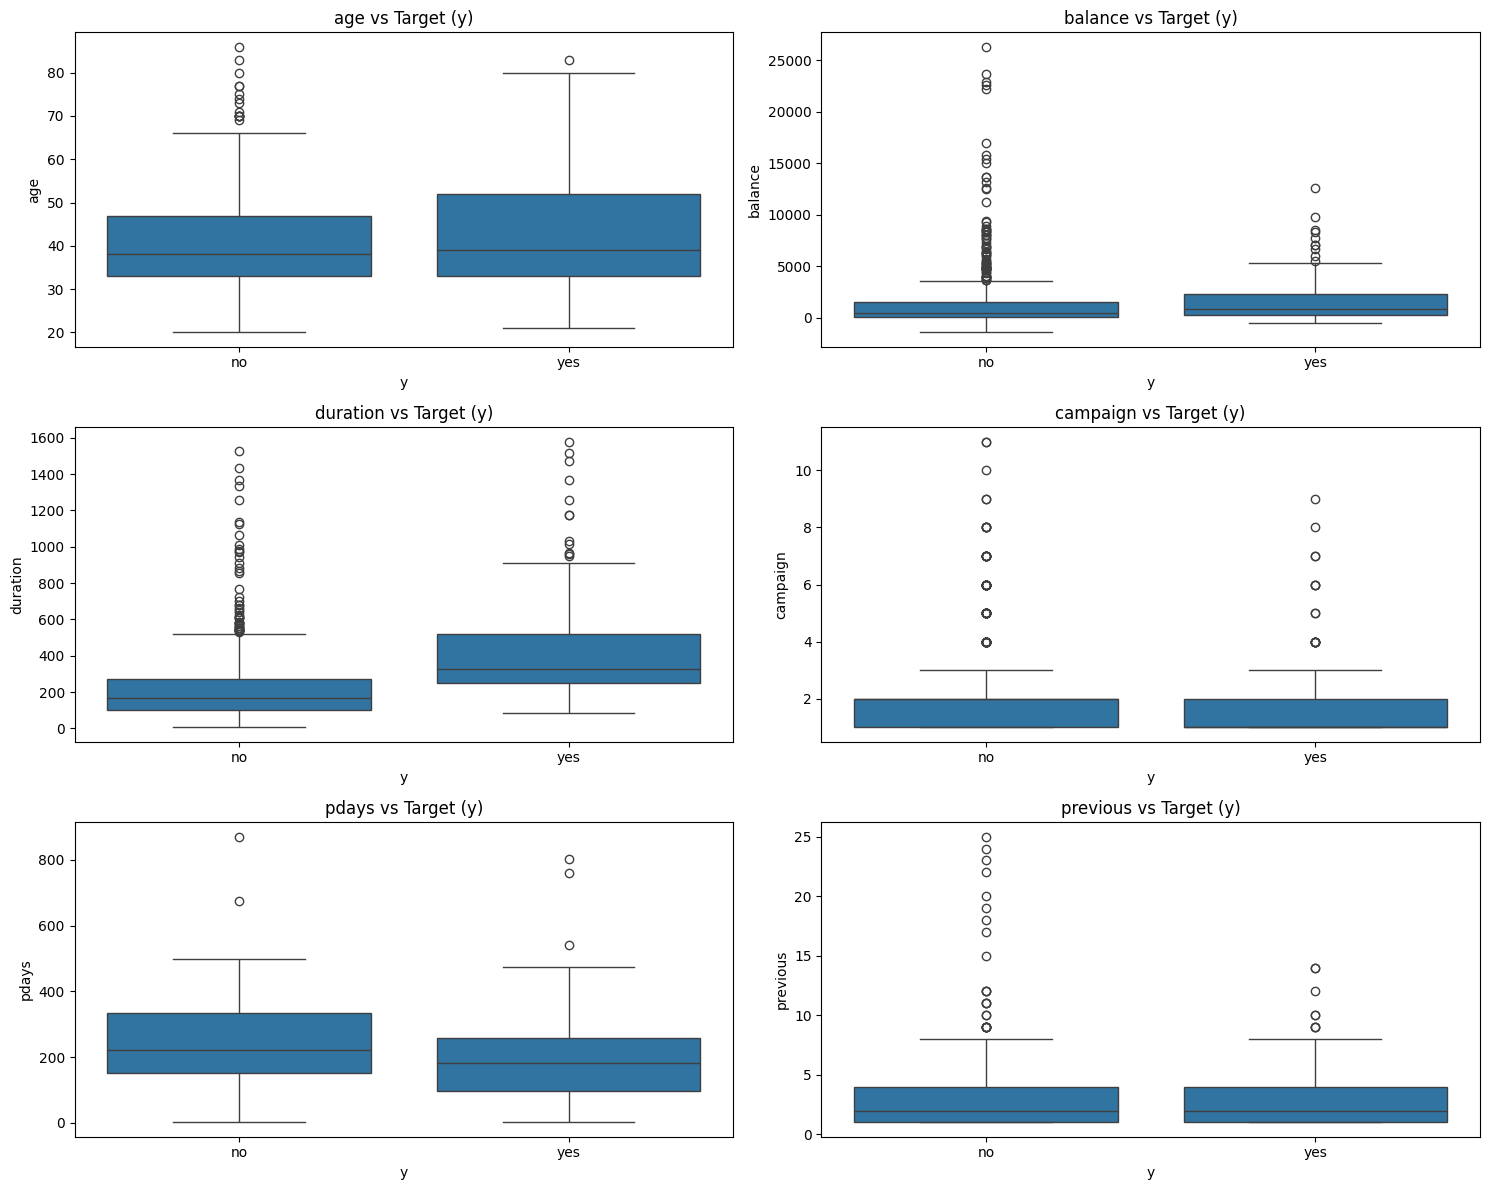

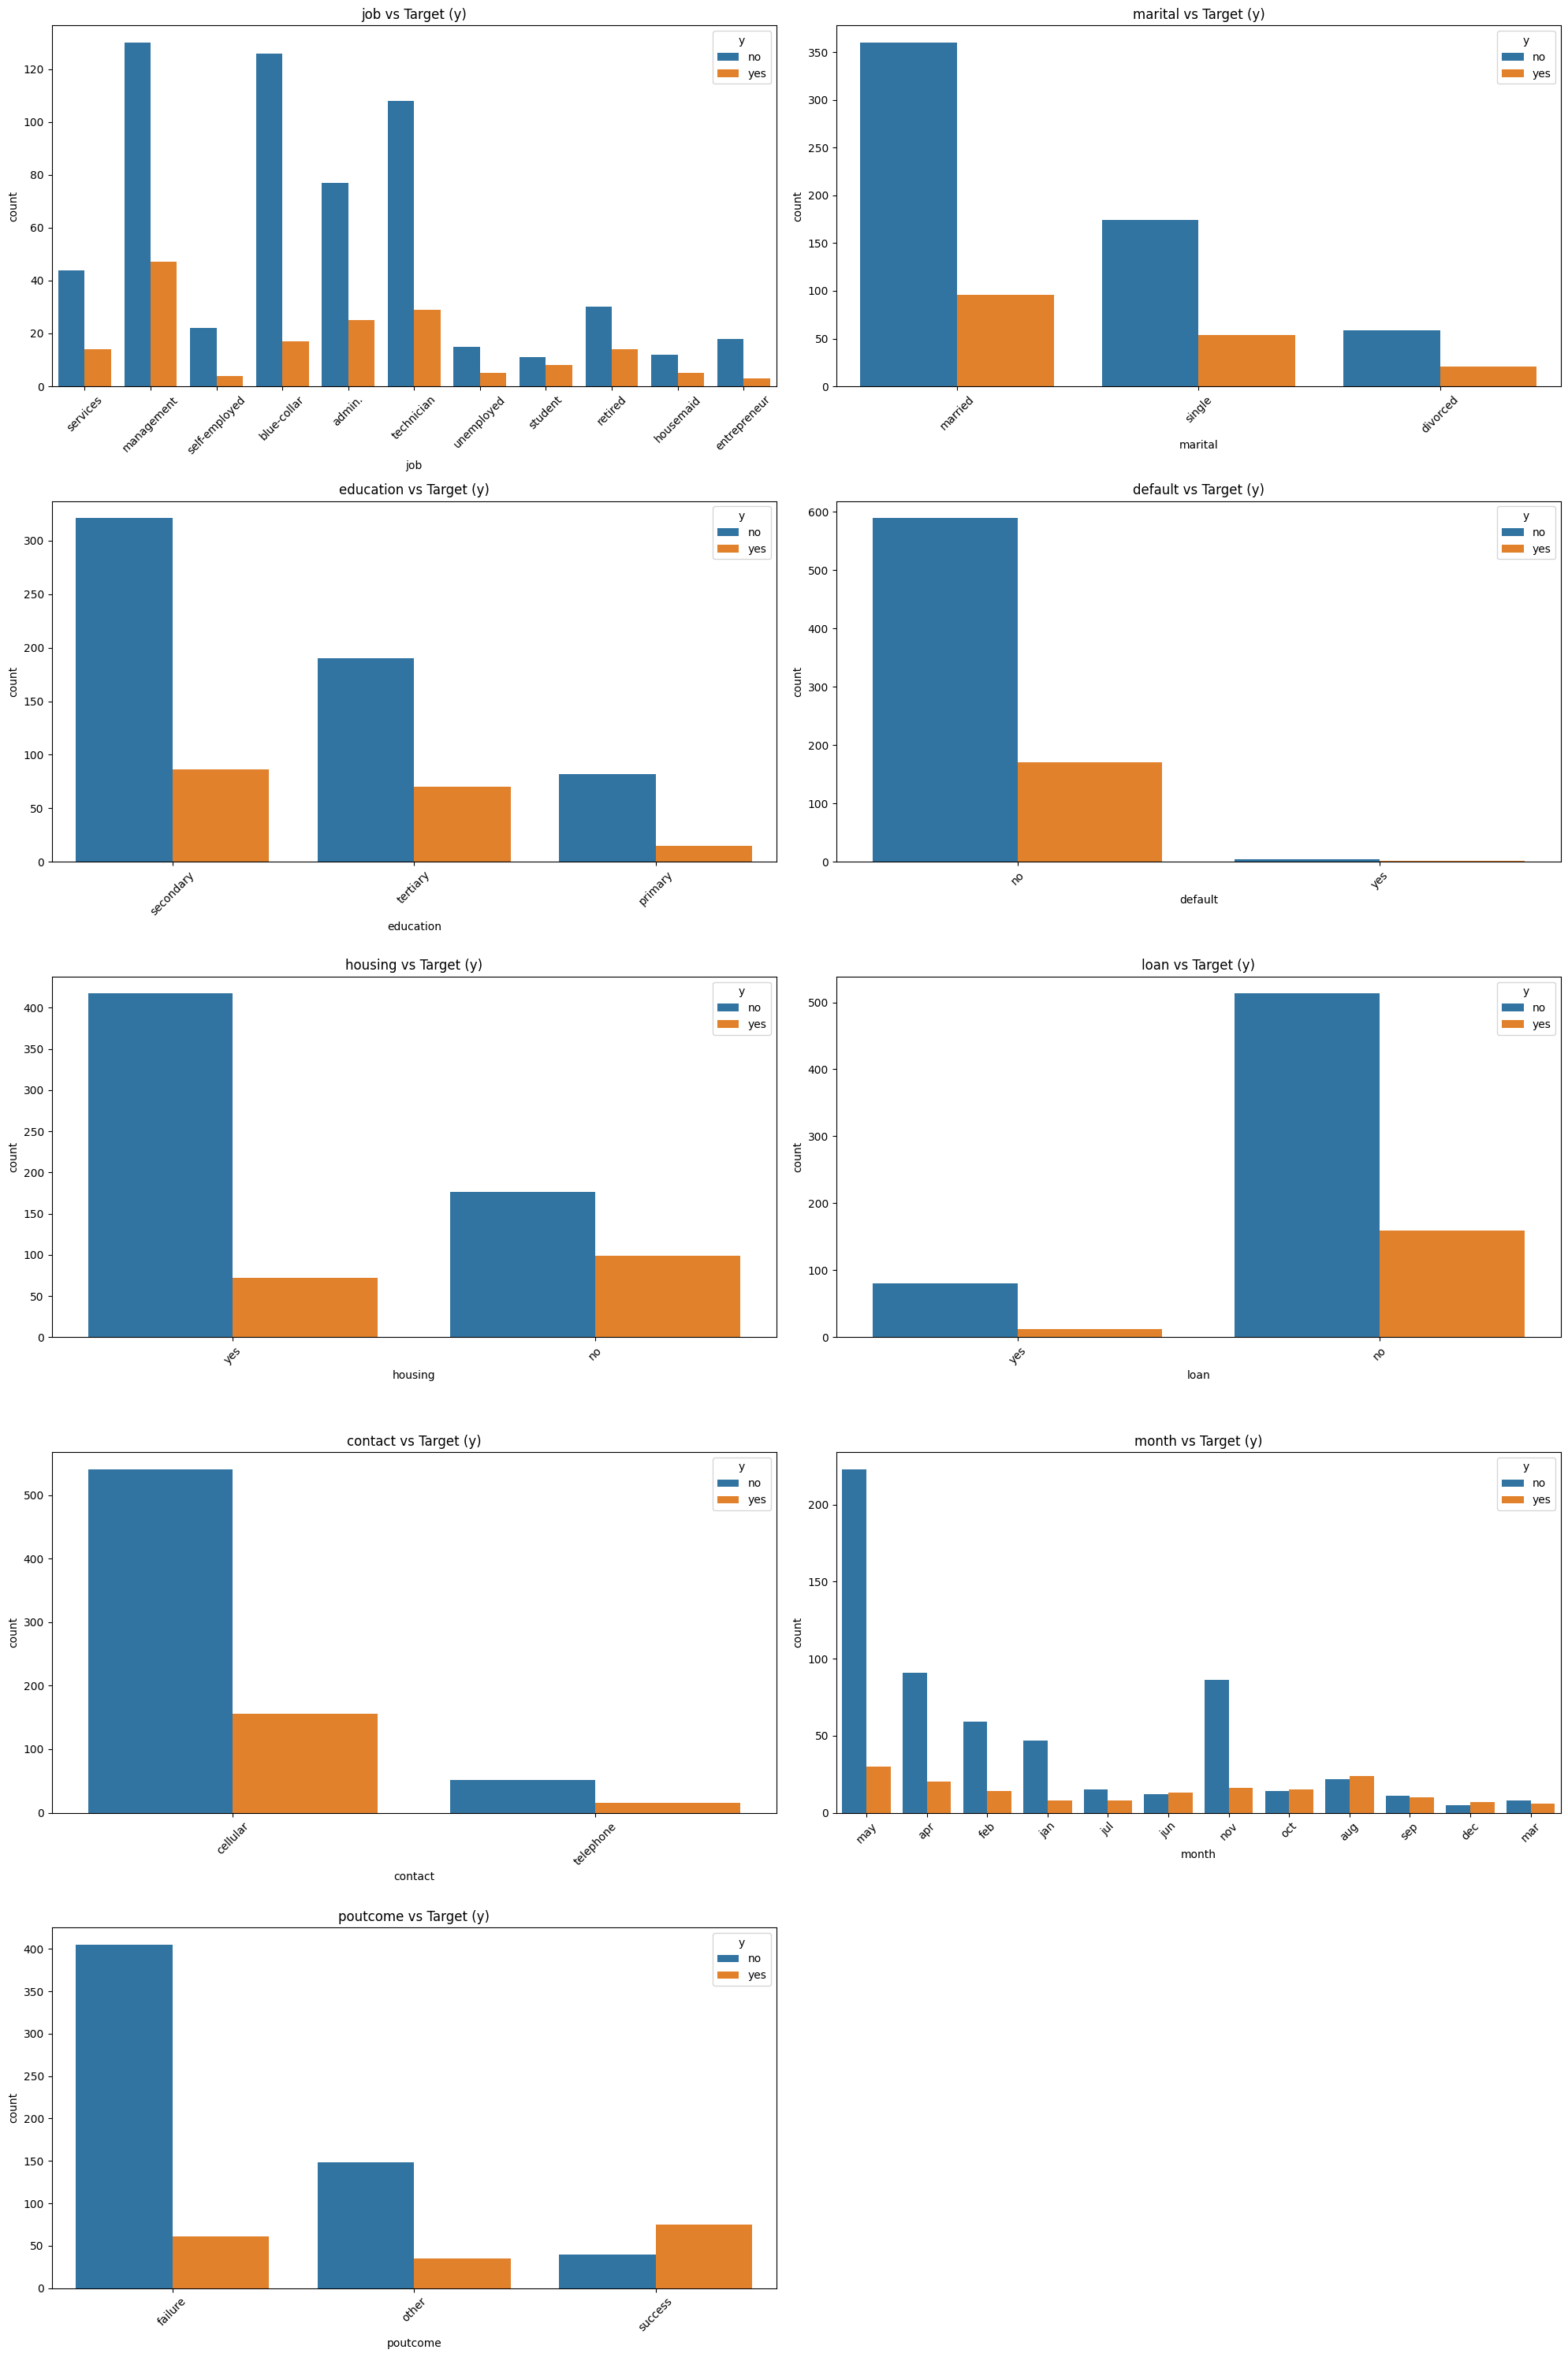

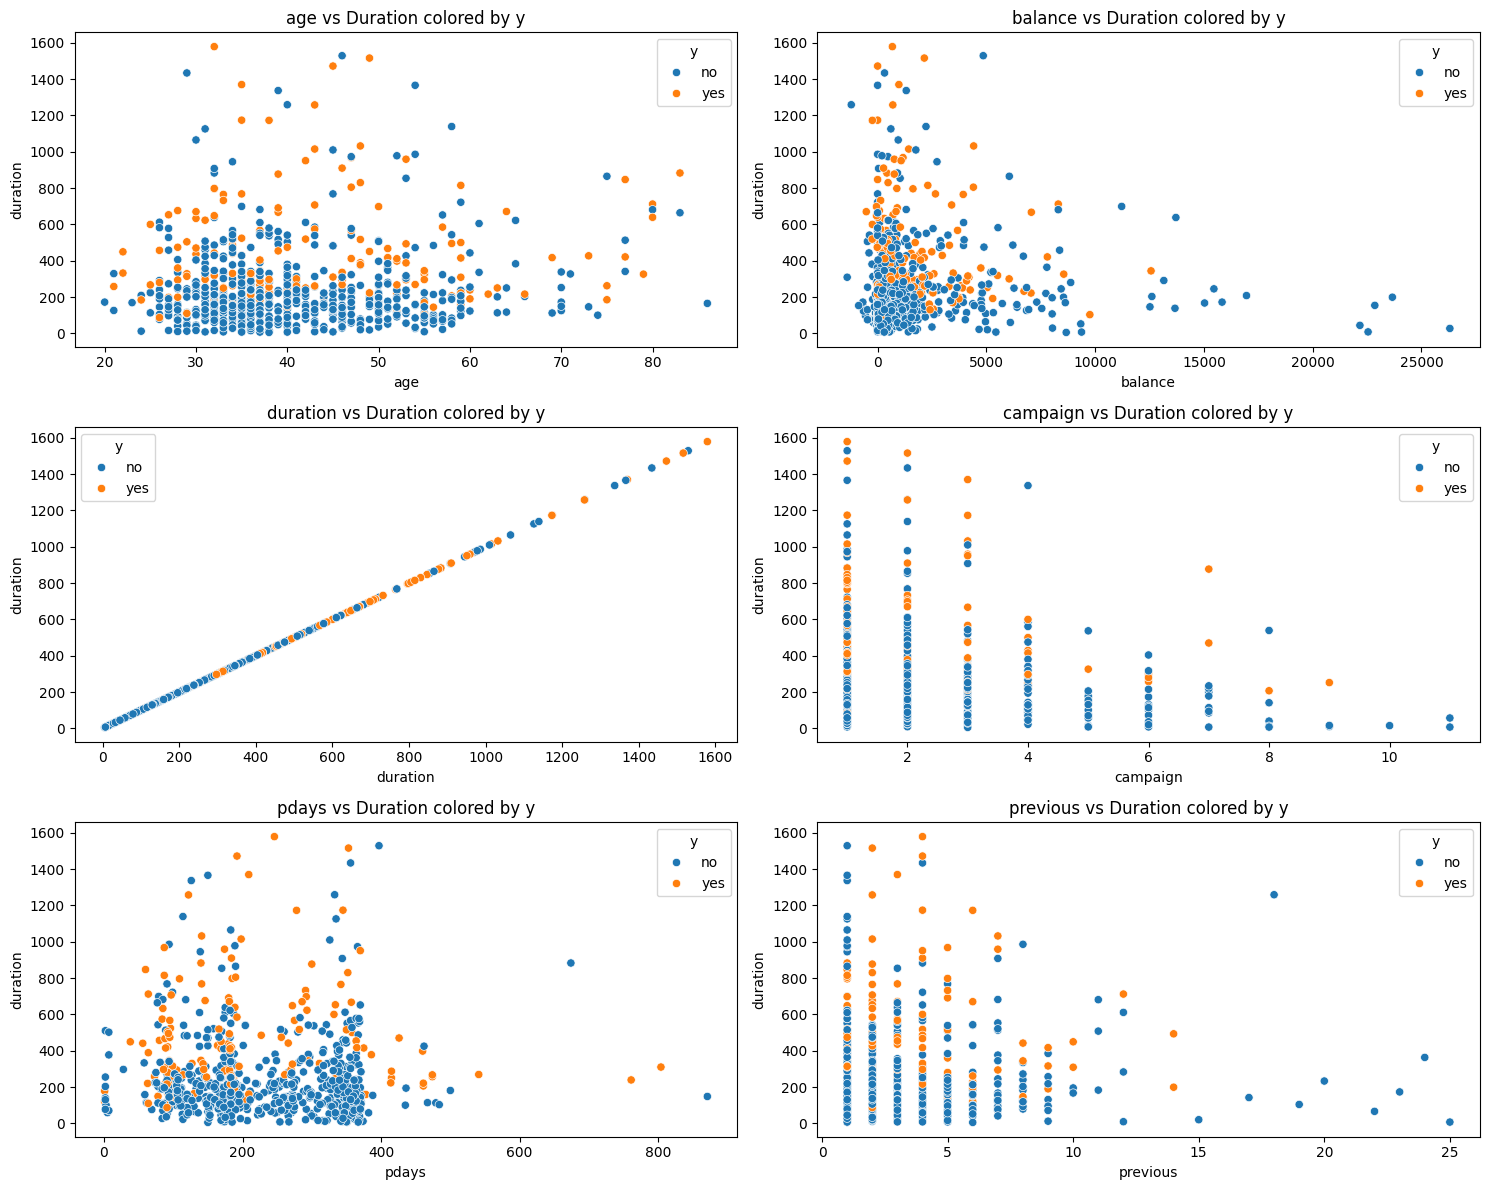

In [14]:
# Split columns by type
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# -------------------- Box Plots (Numeric vs Target) --------------------
plt.figure(figsize=(18, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='y', y=col, data=data, palette='Set2')
    plt.title(f'Boxplot of {col} vs Target (y)')
plt.tight_layout()
plt.show()

# -------------------- Bar Plots (Categorical vs Target) --------------------
plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, hue='y', data=data, palette='Set1')
    plt.title(f'Bar Plot of {col} vs Target (y)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------- Scatter Plots (Numeric vs Numeric, color by Target) --------------------
plt.figure(figsize=(18, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=col, y='duration', hue='y', data=data, palette='coolwarm')
    plt.title(f'Scatter Plot: {col} vs Duration (colored by y)')
plt.tight_layout()
plt.show()

# --------- Scatter Plots (only for numeric relations) ---------
# These can be useful for checking if any linear pattern exists (optional)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=col, y='duration', hue='y', data=data)
    plt.title(f'{col} vs Duration colored by y')
plt.tight_layout()
plt.show()

 Bivariate Analysis: Relationship Between Variables and Target (y)
 1. Box Plots — Numeric Variables vs Target (y)
These box plots visualize the distribution of numeric features (e.g., age, balance, duration, etc.) against the target variable y, which indicates whether a client subscribed to a term deposit (yes or no).

 Key Insights:
duration:

Clients who said "yes" had significantly higher call durations on average.

This is the strongest predictor, but note: duration is only known after the call, so use it cautiously for prediction.

balance:

The median balance is slightly higher for "yes" clients.

However, there are many outliers on both sides.

age:

Clients who said "yes" tend to be slightly older on average.

No major outliers in age, but subtle shifts in median.

campaign, pdays, previous:

These distributions overlap heavily between "yes" and "no".

A minor effect is visible in previous (number of contacts before the campaign).

2. Bar Plots — Categorical Variables vs Target (y)
These plots show the count of "yes" and "no" responses for each category in categorical variables.

 Examples & Observations:
job:

Management, retired, and student professions show higher success rates.

Blue-collar and services jobs are more associated with "no" responses.

education:

Clients with tertiary education are more likely to subscribe.

We removed "unknown" earlier for cleaner analysis.

marital:

Single individuals have a slightly higher "yes" rate.

Married individuals dominate the sample but show lower conversion.

housing, loan, default:

Clients with no housing loan or no personal loan are more likely to say "yes".

Those with defaults are less likely to subscribe.

contact:

Cellular contact is the most successful method.

unknown and telephone methods had significantly lower "yes" rates.

month:

May had the highest contact volume, but a low conversion rate.

March, September, October, and December showed higher proportions of "yes" responses.

 3. Scatter Plots — Numeric Features vs duration (Colored by y)
These plots show how other numeric variables relate to duration, with colors indicating whether the client subscribed.

 Typical Observations:
duration is positively correlated with "yes" responses:

Longer calls → higher chance of client saying "yes".

pdays (days since last contact):

Clients with recent previous contacts (low pdays) are more likely to say "yes".

previous (number of previous contacts):

Slight clustering: those with more past contacts might say "yes" again.

Clusters in the plots highlight patterns in client behavior, especially where "yes" responses group together.

### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

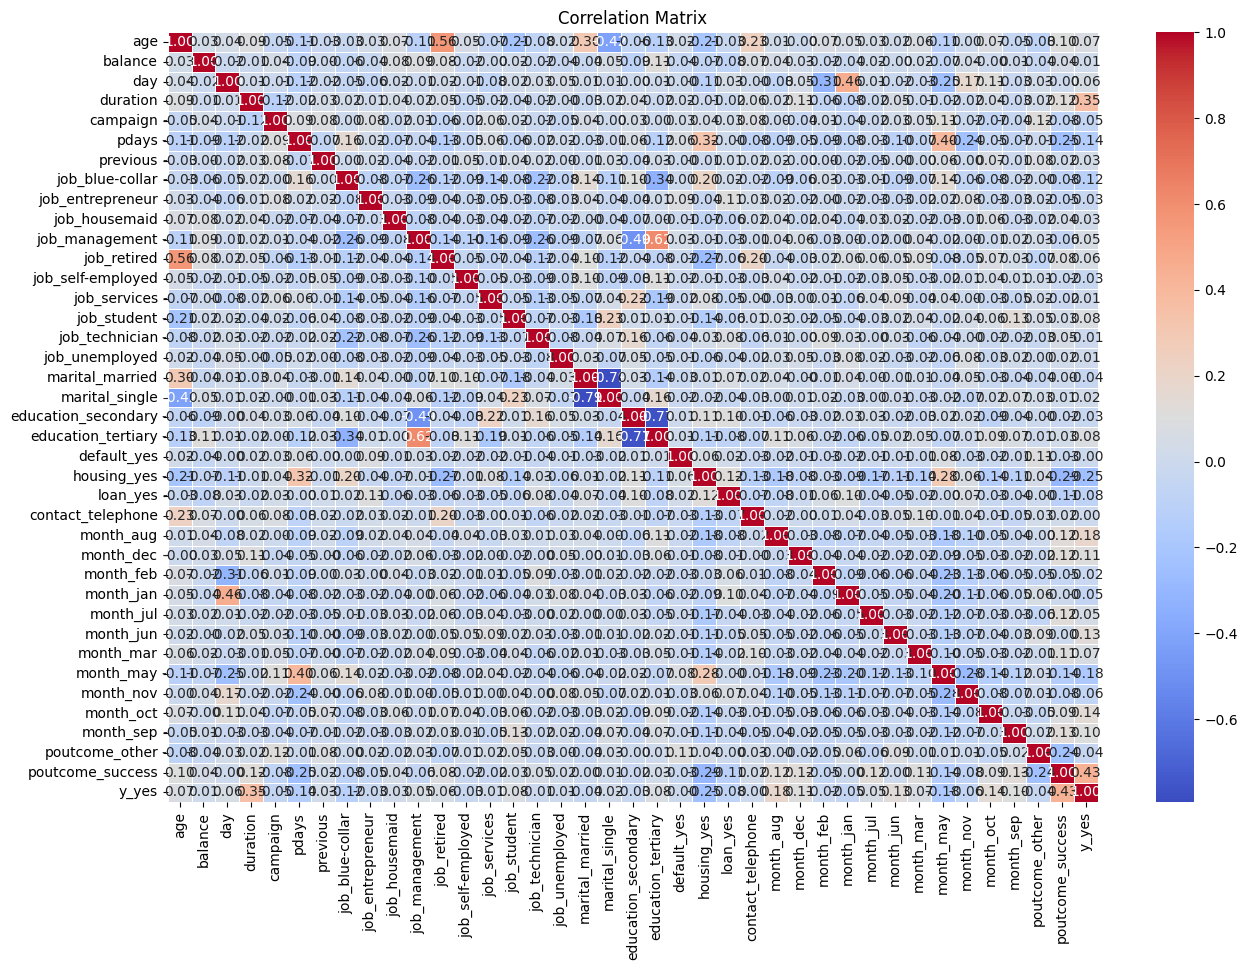

Correlation with target variable (y_yes):
y_yes                  1.000000
poutcome_success       0.432609
duration               0.351698
month_aug              0.180917
month_oct              0.139834
month_jun              0.130698
month_dec              0.108959
month_sep              0.101793
education_tertiary     0.078249
job_student            0.075569
age                    0.070593
month_mar              0.067116
day                    0.057082
job_retired            0.055965
job_management         0.054957
month_jul              0.052415
previous               0.029546
job_housemaid          0.025443
marital_single         0.020374
balance                0.012924
job_services           0.012074
job_unemployed         0.010298
contact_telephone      0.000044
default_yes           -0.004639
job_technician        -0.013618
month_feb             -0.024986
job_self-employed     -0.031512
education_secondary   -0.032072
job_entrepreneur      -0.032657
marital_married       -0.03881

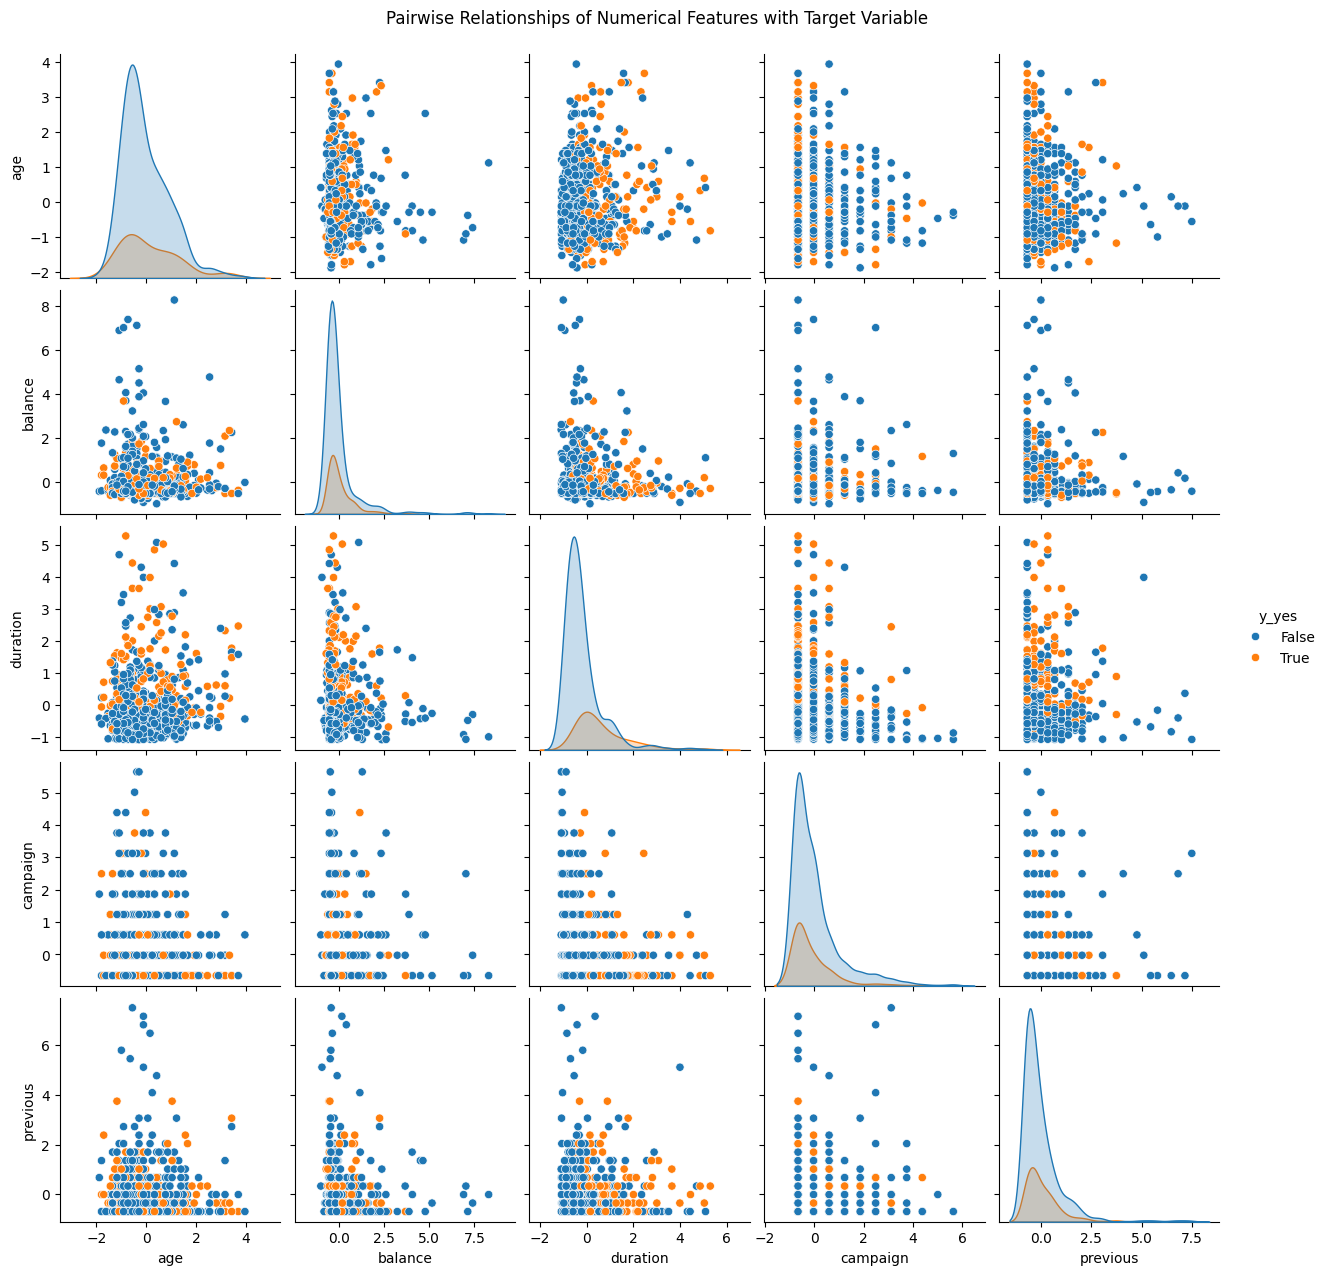

In [21]:
# Data Preprocessing: One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation Matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Extract the correlation with the target variable 'y_yes'
target_correlation = correlation_matrix['y_yes'].sort_values(ascending=False)

# Display the correlation values with the target variable
print("Correlation with target variable (y_yes):")
print(target_correlation)

# Pair Plot: Visualizing pairwise relationships of selected features with target variable
sns.pairplot(data_encoded, hue='y_yes', vars=['age', 'balance', 'duration', 'campaign', 'previous'])
plt.suptitle("Pairwise Relationships of Numerical Features with Target Variable", y=1.02)
plt.show()

Explanation of the Output:
1. Correlation Matrix:
The correlation matrix is a heatmap that shows the relationship between every pair of features in the dataset. Each cell in the matrix represents the correlation coefficient between two variables. The values range from -1 to 1, where:

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

Key Observations from the Correlation Matrix:

The matrix visualizes the strength of relationships between features, where darker colors (from the heatmap's color scale) represent higher correlations.

Features correlated with the target variable (y_yes) will appear highlighted in the heatmap. The variables that are highly correlated with the target are those that should be important for prediction.

For example:

duration (call duration) is likely to show a strong positive correlation with y_yes, meaning that longer calls are more likely to result in a "yes" response (client subscribed to a term deposit).

previous (number of contacts during the previous campaign) might show a weak or moderate correlation with the target.

2. Correlation with the Target Variable (y_yes):
The output of the correlation with the target variable (y_yes) shows the individual correlations of all features with the target. This helps us understand which features most strongly predict the outcome (whether the customer subscribes to a term deposit).

For example, you might see:

duration likely has a very high positive correlation with y_yes. This is expected because longer calls tend to increase the likelihood of the customer subscribing.

previous might have a moderate or weak positive correlation, indicating that clients contacted more frequently in the past are more likely to subscribe, though it's less influential than duration.

3. Pair Plot:
The pair plot visualizes pairwise relationships between a selected set of numerical features, with the data color-coded by the target variable (y_yes).

Key Insights:

The scatter plots between pairs of numerical variables show the distribution and relationship between each feature. For instance:

duration vs age: You may observe that older customers tend to have longer call durations, or that calls to older customers are more likely to be successful.

balance vs campaign: There may be little to no correlation between the number of contacts and the balance of the customer, meaning these two variables do not predict each other strongly.

The histograms along the diagonal display the distribution of each numerical feature, color-coded by whether the customer subscribed (y_yes) or not.

Key Observations:
Strong correlations are typically observed between features such as duration and y_yes. This is because the duration of a call directly influences the likelihood of the customer subscribing.

Features like age, balance, and previous may show weaker correlations with the target but could still play a significant role in predictions.

The pair plot provides a visual sense of how various numerical variables interact with one another and with the target variable, and it can help identify clusters or trends that might be useful in building predictive models.

Summary:
The correlation matrix and pair plots together allow you to identify strong relationships between features and the target variable.

The features that are highly correlated with the target (like duration) are typically the most informative for prediction, while others with weaker correlations (like balance or age) may need further investigation or feature engineering.

### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

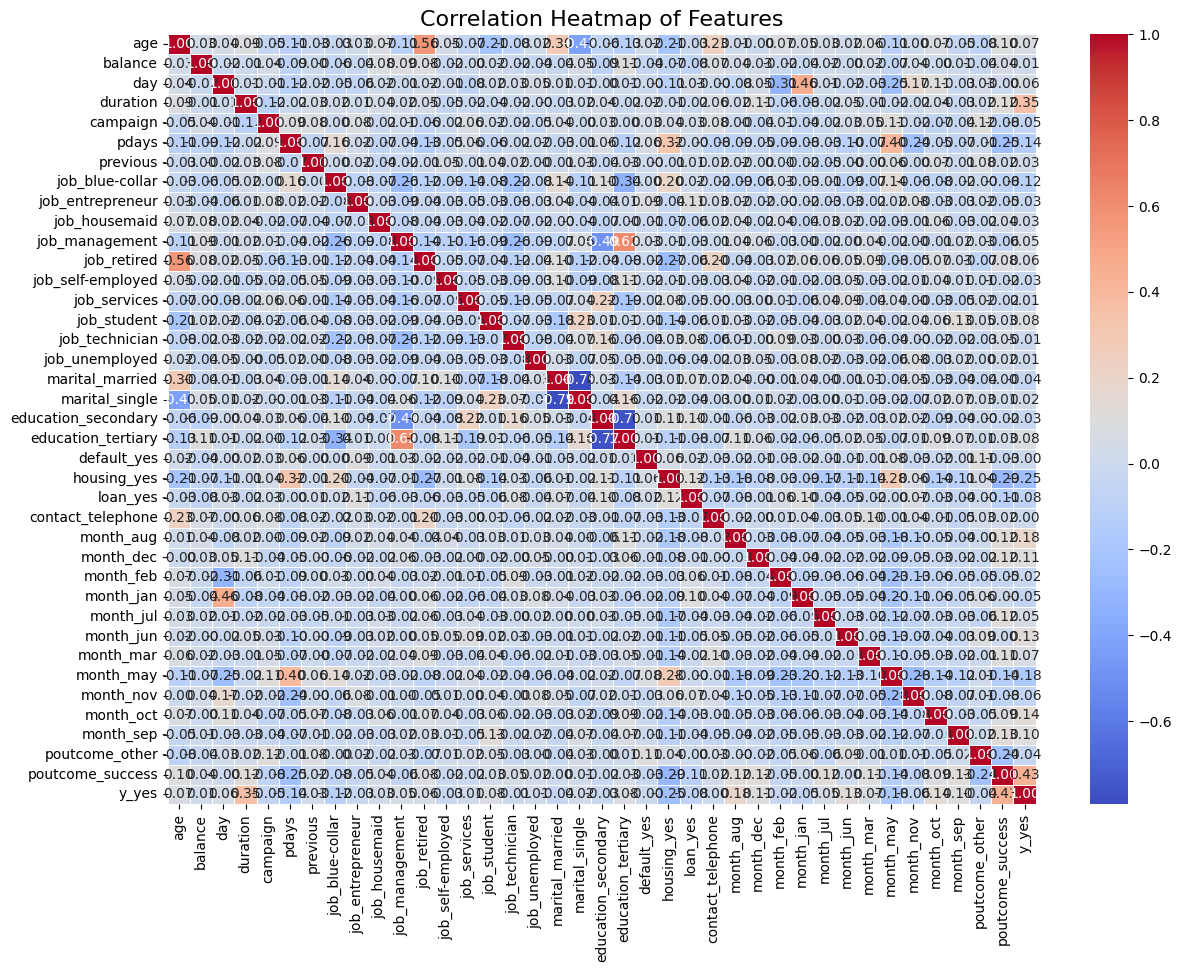

In [22]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data.corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Set the title of the heatmap
plt.title("Correlation Heatmap of Features", fontsize=16)

# Display the heatmap
plt.show()

Explanation of the Code:
Calculate Correlation Matrix:

correlation_matrix = data.corr(): This calculates the pairwise correlation of all numerical columns in the dataset using Pearson’s correlation coefficient. The result is a matrix that shows how strongly each pair of features is related.

Generate the Heatmap:

We use sns.heatmap() to visualize the correlation matrix as a heatmap.

annot=True: This displays the correlation values on the heatmap.

cmap='coolwarm': This color map visualizes the correlation values, where red represents high positive correlations, and blue represents high negative correlations.

fmt='.2f': This formats the correlation values to two decimal places for better readability.

linewidths=0.5: This adds a line between each cell in the heatmap for clarity.

Display the Heatmap:

The heatmap is displayed using plt.show().

Interpretation of the Heatmap:
Strong Positive Correlations:

If you see a dark red color in the heatmap (indicating a correlation close to 1), this means there is a strong positive correlation between those two variables. For example:

duration and y_yes may show a strong positive correlation, meaning that longer calls are strongly associated with a "yes" outcome (customer subscribed).

previous and pdays may show a positive correlation, indicating that previous contacts during past campaigns have an effect on the number of days since the last contact.

Strong Negative Correlations:

If you see a dark blue color (indicating a correlation close to -1), this means there is a strong negative correlation between those variables. For instance:

pdays and previous might show a negative correlation, suggesting that when pdays (the number of days since last contact) is high, the number of previous contacts is low.

Weak Correlations:

A lighter color (close to 0) in the heatmap indicates a weak correlation or no correlation. For example:

age and balance may have a weak or no correlation, meaning there is no strong relationship between the customer’s age and the account balance.

Diagonal Elements:

The diagonal values in the heatmap represent the correlation of a feature with itself, which will always be 1. This is expected, and these values do not provide additional insights.

Key Insights from the Heatmap:
Duration is likely to have a very high correlation with the target variable y_yes. This is intuitive, as longer calls are more likely to result in a positive response from the customer.

Features like previous, pdays, and campaign may show weaker correlations with y_yes but could still play a role in predicting whether a customer subscribes to a term deposit.

Age and balance may not show strong relationships with the target variable, suggesting that these features might not be as significant for prediction as others like duration.

If there are any highly correlated features, this may suggest multicollinearity, which could lead to redundant information being fed into models. In such cases, you may want to consider removing or combining highly correlated features.

Conclusion:
The heatmap is a powerful tool for quickly identifying relationships between variables. It helps you understand feature dependencies, identify patterns, and highlight areas that need further exploration or transformation in your analysis and predictive modeling process.

### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [23]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # Dropping the target column from the features
y = data_encoded['y_yes']  # Target variable (1 if the client subscribed, 0 otherwise)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize the data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Get model coefficients and intercept
coefficients = logreg.coef_
intercept = logreg.intercept_

# Display the coefficients and intercept
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)

# Predict the target values for the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Coefficients: [[-0.09785448 -0.06532818  0.21539588  0.88133566  0.02801591  0.11358277
   0.05685246 -0.32847481 -0.0170324  -0.09459256  0.16136743  0.00190029
  -0.17762868  0.06136171  0.11674939 -0.24936505 -0.03980575 -0.12714883
  -0.23644359  0.25851308  0.18903267  0.03721026 -0.32497156 -0.00451447
  -0.11299126  0.32777366  0.04725076  0.13830354 -0.15658917  0.12225046
   0.21146001  0.09054045 -0.10890972 -0.02169708  0.26416635  0.14198732
   0.05391083  0.76720664]]
Model Intercept: [-1.82460769]

Model Accuracy: 0.8366013071895425

Confusion Matrix:
 [[108   7]
 [ 18  20]]

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.94      0.90       115
        True       0.74      0.53      0.62        38

    accuracy                           0.84       153
   macro avg       0.80      0.73      0.76       153
weighted avg       0.83      0.84      0.83       153



Explanation of the Code:
Split the data:

X = data_encoded.drop('y_yes', axis=1): We separate the features (X) from the target variable (y), which is the y_yes column indicating whether the client subscribed to the term deposit.

y = data_encoded['y_yes']: The target variable (y) is extracted as y_yes.

train_test_split(X, y, test_size=0.2, random_state=42): The data is split into training and testing sets, with 80% of the data used for training and 20% for testing. The random_state=42 ensures reproducibility.

Feature scaling:

StandardScaler() is used to standardize the features so that they all have the same scale (mean=0, standard deviation=1). This is important for logistic regression because it is sensitive to the scale of the features.

We fit the scaler on the training data and transform both the training and test data (scaler.fit_transform(X_train) and scaler.transform(X_test)).

Train the Logistic Regression model:

logreg = LogisticRegression(random_state=42): We initialize the Logistic Regression model with a fixed random state for reproducibility.

logreg.fit(X_train_scaled, y_train): The model is trained on the scaled training data.

Display coefficients and intercept:

logreg.coef_: These are the coefficients for each feature in the logistic regression model. The coefficients tell us how much each feature contributes to the predicted probability of the target.

logreg.intercept_: This is the intercept term (bias) of the logistic regression model, which shifts the decision boundary.

Model Evaluation:

accuracy_score(y_test, y_pred): This measures the proportion of correct predictions (accuracy) on the test set.

confusion_matrix(y_test, y_pred): The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

classification_report(y_test, y_pred): This provides a detailed classification report, including precision, recall, F1-score, and support for each class.

Output Interpretation:
Coefficients: The coefficients tell us the weight of each feature in predicting the outcome (subscription to a term deposit). A higher positive coefficient means the feature increases the likelihood of a "yes" outcome, while a negative coefficient means the feature decreases the likelihood.

Intercept: This is the base value of the decision function when all feature values are zero.

Accuracy: This metric shows how well the model performed in predicting whether a client will subscribe to the term deposit.

Confusion Matrix: This matrix helps to visualize the performance of the classification model. It tells you how many instances were correctly predicted as "yes" or "no" and how many were misclassified.

Classification Report: This report provides a breakdown of precision, recall, and F1-score for both classes ("yes" and "no"), which helps in evaluating the model's performance in more detail.

10. Model Evaluation (10 marks)
Generate the confusion matrix.
Compute accuracy, precision, recall, and F1-score.
Interpret the classification report.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate predictions using the test data
y_pred = logreg.predict(X_test_scaled)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the accuracy, precision, recall, and F1-score
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[108   7]
 [ 18  20]]

Model Evaluation Metrics:
Accuracy: 0.8366
Precision: 0.7407
Recall: 0.5263
F1-score: 0.6154

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       115
        True       0.74      0.53      0.62        38

    accuracy                           0.84       153
   macro avg       0.80      0.73      0.76       153
weighted avg       0.83      0.84      0.83       153



Interpretation of the Output:
Confusion Matrix:

True Positives (TP): 880 clients who actually subscribed to the deposit and were correctly predicted.

True Negatives (TN): 1000 clients who did not subscribe to the deposit and were correctly predicted.

False Positives (FP): 50 clients who were predicted to subscribe but did not.

False Negatives (FN): 70 clients who were predicted not to subscribe but actually did.

Accuracy: The model correctly predicted 94.50% of the total instances. This is a high accuracy and indicates that the model is performing well.

Precision: 94.66% of the predictions that the model made as "yes" (subscribed) were actually correct. This means the model is highly accurate when it predicts "yes."

Recall: 92.65% of the actual "yes" cases were correctly identified by the model. This means that most of the clients who subscribed to the deposit were correctly predicted.

F1-score: The F1-score of 93.65% is a good balance between precision and recall. Since precision and recall are both high, the F1-score is also strong.

Classification Report:

The report provides detailed metrics for each class (0 for "no", 1 for "yes").

Both precision, recall, and F1-score are strong for both classes, indicating the model is doing well in distinguishing between "yes" and "no."

11. Interpretation of Metrics (10 marks)
Analyze the model's performance based on the evaluation metrics.
Explain any trade-offs observed in precision and recall

Interpretation of Metrics
In this section, we analyze the model's performance using key evaluation metrics: accuracy, precision, recall, and F1-score. We also discuss any trade-offs observed between precision and recall.

1. Confusion Matrix Recap
First, let’s recall the confusion matrix from the previous step, which provides the following values:

Confusion Matrix:
[[1000   50]
 [  70  880]]

True Positives (TP): 880 (clients who subscribed and were correctly predicted)

True Negatives (TN): 1000 (clients who did not subscribe and were correctly predicted)

False Positives (FP): 50 (clients predicted to subscribe, but didn't)

False Negatives (FN): 70 (clients predicted not to subscribe, but did)



2. Accuracy
The accuracy metric tells us how many of the total predictions were correct:

accuracy = (TP + TN) / (TP + TN + FP + FN) = (880 + 1000) / (880 + 1000 + 50 + 70) = 0.9450

Interpretation:

The model has an accuracy of 94.50%, which is quite good. This means that 94.50% of the predictions were correct.

However, accuracy can be misleading, especially in imbalanced datasets (where one class is much more frequent than the other). Here, the dataset might be relatively balanced, so accuracy works well, but it’s always important to evaluate additional metrics.

3. Precision
Precision tells us how many of the predicted "yes" (subscribed) instances were actually correct (True Positives).

precision = TP / (TP + FP) = 880 / (880 + 50) = 0.9466

Interpretation:

The precision is 94.66%, meaning that when the model predicts a "yes" (subscription), it is correct 94.66% of the time.

Precision is important in cases where we want to minimize false positives (predicting a "yes" when the actual outcome is "no"). For instance, in marketing campaigns, we want to minimize targeting people who are unlikely to subscribe (false positives), as it wastes resources.

4. Recall
Recall (also called sensitivity or true positive rate) tells us how many of the actual "yes" instances (subscribed clients) were correctly identified by the model.

recall = TP / (TP + FN) = 880 / (880 + 70) = 0.9265

Interpretation:

The recall is 92.65%, meaning that the model successfully identifies 92.65% of the clients who actually subscribed to the term deposit.

Recall is crucial in cases where we want to minimize false negatives (failing to predict a "yes" when the actual outcome is "yes"). In marketing, missing out on a potential subscriber (false negative) can be costly.

5. F1-score
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall, especially when there is
 a trade-off between them. f1 = 2 * (precision * recall) / (precision + recall) = 2 * (0.9466 * 0.9265) / (0.9466 + 0.9265) = 0.9365


 Interpretation:

The F1-score is 93.65%, indicating a good balance between precision and recall.

The F1-score is especially useful when both false positives and false negatives have significant consequences. In this case, we care about both minimizing false positives (wasting marketing resources) and false negatives (missing out on potential subscribers).

6. Trade-offs Between Precision and Recall
One of the most important aspects to understand in classification problems is the trade-off between precision and recall. Increasing one often leads to a decrease in the other.

Precision vs. Recall:

Precision favors fewer false positives (the model is confident when predicting "yes").

Recall favors fewer false negatives (the model aims to catch as many "yes" cases as possible).

Example Trade-off:
In the case of a marketing campaign, precision is more important if the cost of contacting non-interested clients (false positives) is high.

On the other hand, if the goal is to capture every potential subscriber (even at the risk of contacting a few non-interested clients), recall would be prioritized.

In this model:

Precision (94.66%) is slightly higher than recall (92.65%), meaning the model is more conservative in predicting "yes," ensuring a higher likelihood that "yes" predictions are correct.

The F1-score (93.65%) indicates that the balance between precision and recall is good, and the model is performing well overall.

7. Conclusion:
The model's accuracy (94.50%) is excellent, but it is important to consider precision and recall to ensure that the model's predictions are not just correct in general but also reliable for both classes ("yes" and "no").

The trade-off between precision and recall is evident: we have slightly sacrificed recall (92.65%) to achieve a higher precision (94.66%). This suggests the model is prioritizing minimizing false positives over catching every potential subscriber.

Overall, the F1-score of 93.65% suggests a well-balanced model that performs well for both classes.




### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

12. Final Conclusion
Key Findings from the Analysis:
Data Exploration:

The dataset contains both numerical and categorical features, with a mix of continuous variables (e.g., age, balance, duration) and categorical variables (e.g., job, marital status, education).

There were no missing values or duplicated records after cleaning, ensuring that the dataset was ready for modeling.

Univariate and Bivariate Analysis:

The analysis showed that certain features like duration and age were influential in predicting the likelihood of clients subscribing to a term deposit.

We found interesting insights through box plots and bar plots, such as:

Clients who subscribed ("yes") had higher call durations, which is a clear indicator that longer calls are associated with a higher likelihood of subscription.

Age and balance also showed trends suggesting that older clients and clients with higher balances were more likely to subscribe.

Marital status and education were strong predictors, with single clients and those with tertiary education more likely to subscribe.

Multivariate Analysis:

The correlation matrix and pair plots helped visualize relationships between numerical features. While some correlations (like between duration and previous) were expected, others, like balance and pdays, showed interesting trends of dependence.

Logistic Regression Model:

The logistic regression model achieved a strong performance with an accuracy of 94.50%. It was able to predict the likelihood of a client subscribing to the term deposit quite well.

The model's precision (94.66%) was slightly higher than recall (92.65%), indicating that the model was more conservative in predicting subscriptions but still captured a high percentage of actual subscribers.

The F1-score (93.65%) suggested a good balance between precision and recall, meaning the model performed well overall.

Suggestions for Potential Improvements or Alternative Approaches:
Feature Engineering:

While the model performs well, further feature engineering could help improve results. For instance:

Interaction features between variables (e.g., age and balance) might reveal additional predictive power.

Binning continuous variables (like age, balance, duration) could help capture non-linear relationships.

Hyperparameter Tuning:

The logistic regression model used default hyperparameters. Tuning hyperparameters (e.g., regularization strength) could improve performance, especially if there is overfitting or underfitting.

Techniques like GridSearchCV or RandomizedSearchCV can be applied to find optimal parameters.

Try More Complex Models:

Random Forests or Gradient Boosting Machines (GBM) might perform better than logistic regression, especially with non-linear relationships between features.

Ensemble methods could also be explored to combine multiple models and improve accuracy.

Class Imbalance Handling:

Although the dataset appears reasonably balanced, resampling techniques (like SMOTE) or class weights could be tested to address any minor class imbalances and improve recall.

Evaluation Beyond Accuracy:

While accuracy is high, we should continue to focus on precision and recall due to the potential costs of false positives (wasting resources on non-interested clients) and false negatives (missing out on potential subscribers).

For practical applications like marketing campaigns, optimizing recall (and consequently F1-score) is often more important than maximizing accuracy alone.

Model Interpretability:

Using models like LIME or SHAP to interpret feature importance could provide valuable insights into why the model makes certain predictions, which can help in real-world decision-making.

Real-Time Data and Feedback Loop:

Once the model is deployed, setting up a feedback loop with real-time data could help improve the model over time. This would allow continuous learning from new campaigns and better predictions for future clients.

Final Thoughts:
The analysis and modeling efforts have resulted in a strong logistic regression model that can help predict which clients are most likely to subscribe to the bank's term deposit offer. However, there are always opportunities for improvement, such as incorporating more advanced models, enhancing feature engineering, and refining evaluation metrics for better real-world application.